In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

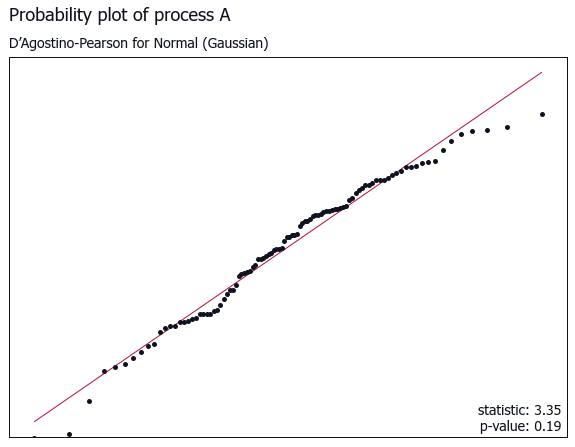

In [3]:
series.blue.test.normal_distribution().plot()

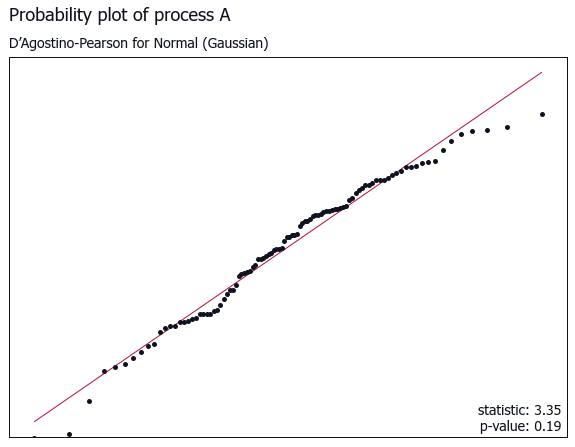

In [4]:
series.blue.test.dagostino_pearson().plot()

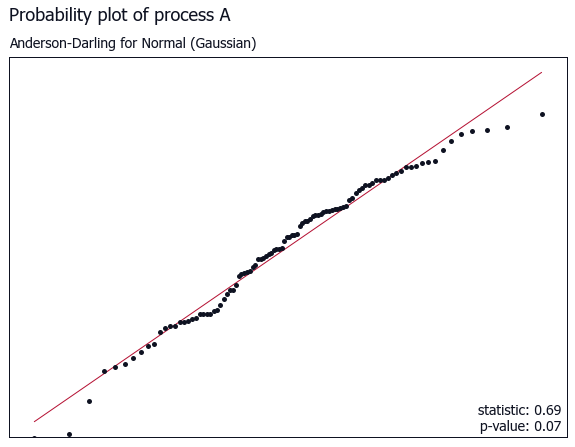

In [5]:
series.blue.test.anderson_darling().plot()

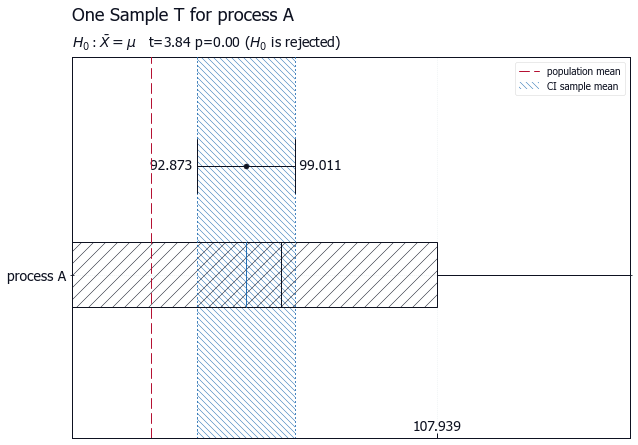

In [8]:
series.blue.test.one_sample_t(popmean=90).plot(xlim=(85,120))

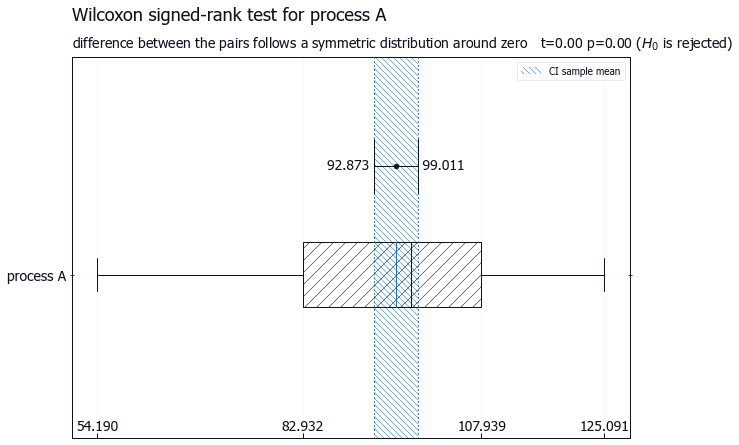

In [7]:
series.blue.test.wilcoxon().plot()

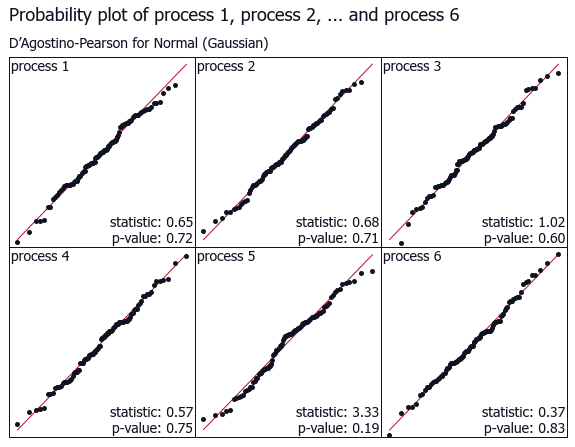

In [8]:
frame.blue.test.normal_distribution().plot()

In [9]:
frame.blue.test.normal_distribution().p_values

process 1    0.721193
process 2    0.711090
process 3    0.601102
process 4    0.751231
process 5    0.189490
process 6    0.829714
dtype: float64

In [10]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
breaks = frame.shape[0] // 5
loc = list(np.arange(0+breaks, frame.shape[0], breaks))
for x in range(frame.shape[1]):
    if x != 0:
        frame.iloc[loc,x] = np.nan

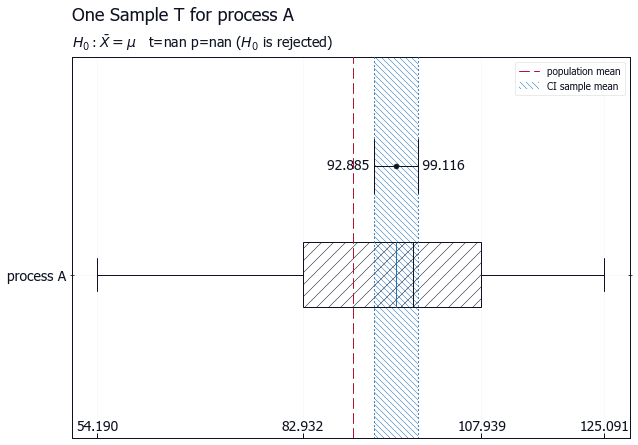

In [11]:
series.blue.test.one_sample_t(popmean=90).plot()

In [13]:
frame.blue.test.f_test(columns=['process 1', 'process 2'])

FTest(nrows=100, ncols=2, alpha=0.05, p_value=0.25, passed=True)